# Linear Soft Margin SVM
SVM is a classification algorithm that aims at finding the decision surface which maximizes the margin between itself and the class samples. <br>
In the context of SVM, we define *margin* as the distance between the hyperplane and the sample which is the closest to it. <br>
The linear function, wrt $\mathbf{x}$:
$$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
$$
represents the equation of the hyperplane, if put equal to zero:
$$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b = 0
$$
Recalling that the perpendicular distance of a point $\mathbf{x}$ from an hyperplane $y(\mathbf{x}) = 0$ is $\mid y(\mathbf{x}) \mid / \|\mathbf{w}\|$, we can write:
$$
d(\mathbf{x}_i) = \frac{\mid \mathbf{w}^T \mathbf{x}_i + b \mid}{\|\mathbf{w}\|}
$$
where $\mathbf{w}$ si always the weights vector, orthogonal to the hyperplane. <br>
We can introduce the same substitution for the classes we used when computing the average Loss Function for L.R.:
$$
z_i = 2c_i - 1 \implies
\begin{cases}
    z_i = 2* 0 - 1 = -1 & \text{if } c_i = 0 \\
    z_i = 2 * 1 - 1 = 1  & \text{if } c_i = 1
\end{cases}
$$
Since at the numerator we have the absolute value, the the distance doesn't change if we write:
$$
d(\mathbf{x}_i) = \frac{\mid z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \mid}{\|\mathbf{w}\|}
$$
If we just want to consider solutions which **correctly classify all samples**, we can thus maximize, wrt the model parameters $(\mathbf{w}, b)$, the objective function:
$$
\operatorname*{argmax}_{\mathbf{w}, b} \left\{ \operatorname*{min}_{i} \left\{\frac{\mid z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \mid}{\|\mathbf{w}\|} \right\} \right\} \\[1em]
\text{subject to: } z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) > 0
$$
So, in other words, we want to find the hyperplane, described by $(\mathbf{w}, b)$, which has the maximum distance to its closest point, so the largest minimum distance from the samples. The contraint ensures we just select hyperplanes which make just correct clasifications. <br>
We can write this in a more compact form, and meanwhile also drop the contraint and the absolute value at the denominator, observing that all solutions which correctly classify all samples meet the contraint for each sample $\mathbf{x}_i$ and so for them we will always have $\operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} > 0$, so:
$$
\operatorname*{argmax}_{\mathbf{w}, b} \left\{ \frac{1}{\|\mathbf{w}\|} \operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} \right\}
$$
Now, we can exploit the property of this objective function being **invariant to rescaling**, i.e. given the rescaling factor $\phi > 0$ we know that both functions:
$$
\frac{1}{\|\mathbf{w}\|} \operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} \\[1em]
\frac{1}{\|\phi \mathbf{w}\|} \operatorname*{min}_{i} \left\{ z_i \left( \phi \mathbf{w}^T \mathbf{x}_i + \phi b \right) \right\} \\[1em]
$$
will lead to both optimal solutions $(\mathbf{w}^*, b^*)$ or $(\phi \mathbf{w}^*, \phi b^*)$. In other words, the collection of parameters $(\phi \mathbf{w}^*, \phi b^*)\mid_{\phi > 0}$ forms an **equivalence class** of equivalent solutions. <br>
Because of the fact that we can choose any solution among them, to simplify the objective function we choose the one corresponding to $\phi = 1$, so for which we have:
$$
\operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} = 1
$$
The objective function thus becomes just:
$$
\frac{1}{\|\mathbf{w}\|} \\[1em]
\text{subject to: } 
\begin{cases}
\operatorname*{min}_{i} \left\{ z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \right\} = 1 \\
z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 \space \forall i
\end{cases}
$$
Then, in order to link the SVM objective to the L.R. one, we can make some constant transformations. Then we can also drop the first contraint observing that, since we're **minimizing** the objective function (because we now put $\mathbf{w}$ at the numerator thanks to these transformations), optimal solutions will have just points such that $z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1$, so we can write the **Primal Formulation of the Hard-Margin SVM Problem**:
$$
\operatorname*{argmin}_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 \\[1em]
\text{subject to: } z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 \space \forall i
$$
It's called **Hard Margin** since all of this is based on the assumption that the optimal solution always correctly classify all points (and this is expressed in the contraint). <br>

Then, the steps to recover the **Soft Margin** version of the primal formulation of the problem are pretty quick.<br>
If classes are **not linearly separable**, we won't be abe to find a solution which satisfies the primal contraint $z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 \space \forall i$. We can make a trade off and accept to have some samples which sit **inside the margin region** (for them we would have $ 0 \leq z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \lt 1$) or, if we want, are even **missclassified** (i.e, they end up on the opposite side of the decision boundary after the margin, for them we would have $z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \lt 0$) and try to achieve the largest margin between all the correcty classified samples. In  practice, we introduce the so called **slack variables** $\xi_i$ in the primal constraint: 
$$
z_i \left( \mathbf{w}^T \mathbf{x}_i + b \right) \geq 1 - \xi_i \\
\xi_i \geq 0
$$
Keep in mind that $\xi_i \geq 0$ is an additional primal contraint related to the Soft Margin formulation of the problem. So:
- correctly classified points not inside the margin will have $\xi_i = 0$
- correctly classified points which sit inside the margin will have $0 \lt \xi_i \lt 1$
- missclassified points will have $\xi_i \geq 1$

The functional:
$$
\Phi(\xi) = \sum_{i = 1}^{n} (\xi_i)^{\sigma}
$$
- for small values of $\sigma$ is approximately equal to the number of points violating the hard margin contraint
- for $\sigma = 1$ represents **an upper bound** on the number of samples violating the hard margin contraint

Since using small values of $\sigma$ makes the problem not convex anymore, we set $\sigma = 1$ and can finally write the **Primal Formulation of the Soft-Margin SVM Problem**:
$$
\operatorname*{min}_{\mathbf{w}, b, \mathbf{\xi}} \left\{ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i = 1}^{n} \xi_i\right\} \\[1em]
\text{subject to: } 
\begin{cases}
z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) \geq 1 - \xi_i \space \forall i \\
\xi_i \geq 0 \space \forall i
\end{cases}
$$
where $C$ is the hyperparameter which regulates the trade off:
- for small values of $C$ we concentrate more on achieving the largest margin and less on minimizing samples violations, so the model will generalize better on unseen data, but te error rate on the training set will increase
- for high values of $C$ we prefer first to minimize samples vuilations (because the second term in now stronger), and just after we concentrate on achieving a large margin for non violating points. In this case the model will achieve much better performances on the training set but won't be able to generalize as much.

We can even turn this problem into an **unconstrained** one by remembering that:
- correctly classified samples which are not inside the margin region have:
    $$
    \begin{cases}
        \xi_i = 0 \\
        z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) \geq 1
    \end{cases}
    $$
- all the other samples are violating the hard margin primal constraint so they have:
    $$
    \begin{cases}
        \xi_i \gt 0 \\
        z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) = 1 - \xi_i
    \end{cases}
    $$

So $\xi_i$ can either assume value $0$ (first case) or $1 - z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right)$ (second case). <br>
We can directly insert these two cases into the objective and get rid of the primal contraints:
$$
\operatorname*{min}_{\mathbf{w}, b, \mathbf{\xi}} \left\{ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i = 1}^{n} \operatorname*{max} \left[ 0, 1 - z_i \left( \mathbf{w}^T \mathbf{x}_i + b\right) \right]\right\}
$$
where $f(z_i s_i) = \operatorname*{max} \left[ 0, 1 - z_i s_i \right]$ is called **Hinge Loss**. <br> <br>

**Unfortunately, the unconstrained formulation of the primal objective function is non-differentiable. While the L-BFGS method may still be able to find the minimizer of the objective, we have no guarantee that the algorithm will stop close to the optimal value of $(\mathbf{w}, b)$.**

So, we can introduce (and later use) the **Lagrangian formulation** of this problem, incorporating the two primal contraints directly in the objective function, using the two Lagrangian multipliers $\alpha_i \geq 0$, $\mu_i \geq 0$:
$$
L(\mathbf{w}, b, \xi, \alpha, \mu) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \alpha_i [z_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i] - \sum_{i=1}^{n} \mu_i \xi_i
$$
The optimal solution has to satisfy the **KKT conditions**:
1) **Stationary Conditions**: <br>
    These conditions are obtained by taking the partial derivatives of the Lagrangian L with
    respect to each of the primal variables and setting them to zero:
    $$
    \nabla_{\mathbf{w}} L(\mathbf{w}, b, \xi, \alpha, \mu) = \mathbf{w} - \sum_{i=1}^{n} \alpha_i z_i \mathbf{x}_i = 0
    $$

    $$
    \frac{\partial L(\mathbf{w}, b, \xi, \alpha, \mu)}{\partial b} = - \sum_{i=1}^{n} \alpha_i z_i = 0
    $$

    $$
    \frac{\partial L(\mathbf{w}, b, \xi, \alpha, \mu)}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \quad \forall i
    $$

2) **Primal Feasibility Conditions**: <br>
    These are the original inequality constraints of the SVM primal problem. The Lagrangian
    was constructed to incorporate these:
    $$
    z_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i \geq 0 \quad \forall i
    $$

    $$
    \xi_i \geq 0 \quad \forall i
    $$

3) **Dual Feasibility Conditions**: <br>
    The Lagrange multipliers associated with inequality constraints must be non-negative:
    $$\alpha_i \ge 0 \quad \forall i$$
    $$\mu_i \ge 0 \quad \forall i$$

4) **Complementary Slackness Conditions**: <br>
    For each inequality constraint, the product of the Lagrange multiplier and the constraint
    itself must be zero at the optimal solution:
    $$
    \alpha_i [z_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i] = 0 \quad \forall i
    $$

    $$
    \mu_i \xi_i = 0 \quad \forall i
    $$

We can rewrite the objective in a simpler way using the precious results we obtain from the **Stationary Conditions**:
$$
\mathbf{w} = \sum_{i=1}^{n} \alpha_i z_i \mathbf{x}_i
$$

$$
\sum_{i=1}^{n} \alpha_i z_i = 0
$$

$$
\alpha_i = C - \mu_i
$$
Also, combining the conditions: $\alpha_i = C - \mu_i$,  $\alpha_i \geq 0$,  $\mu_i \geq 0$ lets us find the so called **box contraints**:
$$
0 \leq \alpha_i \leq C
$$
Keeping in mind we must satisfy the box contraints, we can replace $\mathbf{w}$, $\alpha_i$ and $\xi_i$ inside the Lagrangian primal objective function to obtain
the **Dual Soft Margin SVM Problem**:
$$
\max_{\alpha} L_D(\alpha) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j z_i z_j \mathbf{x}_i^T \mathbf{x}_j
$$

$$
\text{subject to:}
$$

$$
0 \leq \alpha_i \leq C, \quad \forall i
$$

$$
\sum_{i=1}^{n} \alpha_i z_i = 0
$$

The SVM dual optimization problem can be expressed in **matrix form** as maximizing the objective function $J^D(\alpha)$:

$$
J^D(\mathbf{\alpha}) = -\frac{1}{2}\mathbf{\alpha}^T \mathbf{H} \mathbf{\alpha} + \mathbf{\alpha}^T \mathbf{1}
$$

$$
\text{subject to:}
$$

$$
0 \le \alpha_i \le C, \quad \forall i 
$$

$$
\sum_{i=1}^{n} \alpha_i z_i = 0
$$

where:
* $\mathbf{1}$ is an n-dimensional vector of ones.
* $\mathbf{H}$ is an $n \times n$ matrix whose elements are given by $H_{ij} = z_i z_j \mathbf{x}_i^T \mathbf{x}_j$. This matrix is also known as the Gram matrix of the kernel function (in this case, a linear kernel).

The SVM dual solution, denoted as $\alpha^*$, is the value of $\alpha$ that maximizes $J^D(\alpha)$. The optimal weight vector $\mathbf{w}^*$ of the primal problem is then related to the optimal $\alpha^*$ by:

$$
\mathbf{w}^* = \sum_{i=1}^{n} \alpha_i^* z_i \mathbf{x}_i
$$








Now, the problem is that the L-BFGS algorithm is able to handle box constraints, however it cannot incorporate $\sum_{i=1}^{n} \alpha_i z_i = 0$. <br>
The constraint derives from the presence of the **bias** term in the SVM primal formulation. <br>
We therefore slightly modify the SVM problem as to make the constraint disappear. This way we will be able to use **L-BFGS-B** (the B stands for box-constraints) to **solve the dual problem**. <br>
We reformulate the primal problem as the minimization of
$$
\hat{J}(\hat{\mathbf{w}}) = \frac{1}{2} \|\hat{\mathbf{w}}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - z_i (\hat{\mathbf{w}}^T \hat{\mathbf{x}}_i))
$$
where
$$
\hat{\mathbf{x}}_i = \begin{bmatrix} \mathbf{x}_i \\ 1 \end{bmatrix}, \quad \hat{\mathbf{w}} = \begin{bmatrix} \mathbf{w} \\ b \end{bmatrix}
$$
We can observe that $\hat{\mathbf{w}}^T \hat{\mathbf{x}}_i = \mathbf{w}^T \mathbf{x} + b$, i.e. the scoring rules have the same expression as the original formulation. However, in contrast with the original SVM problem, we are also regularizing the value of the bias term, since we regularize the norm of $\hat{\mathbf{w}}$:
$$
\|\hat{\mathbf{w}}\|^2 = \|\mathbf{w}\|^2 + b^2
$$
Regularization of the bias can, in general, lead to sub-optimal decisions in terms of separating margin. We can mitigate this effect by using a mapping
$$
\hat{\mathbf{x}}_i = \begin{bmatrix} \mathbf{x}_i \\ K \end{bmatrix}
$$
As K becomes larger, the effects of regularizing b become weaker. However, as K becomes larger, the dual problem also becomes harder to solve (i.e. the algorithm may require many additional iterations).

The dual objective of the modified primal SVM becomes the maximization of
$$
\hat{\mathcal{J}}^D(\alpha) = -\frac{1}{2} \alpha^T \hat{\mathbf{H}} \alpha + \alpha^T \mathbf{1}
$$
$$\text{subject to }$$
$$0 \le \alpha_i \le C \quad \forall i \in \{1...n\}$$

i.e., the same formulation as before but without the equality constraint and with matrix $\hat{\mathbf{H}}$ computed from the extended features $\hat{\mathbf{x}}_i$ rather than from the original features $\mathbf{x}_i$:
$$
\hat{\mathbf{H}}_{i,j} = z_i z_j \hat{\mathbf{x}}_i^T \hat{\mathbf{x}}_j
$$


In [167]:
import numpy as np

#load iris and take just two out of three classes
from load_dataset import loadDataSet
from train_validation_split import splitTrainingValidation

numFeatures = 4
D, L = loadDataSet('./iris.csv', numFeatures)

#remove iris-setosa (class 0)
D = D[:, L != 0]
L = L[L != 0]

#assign label 0 to class 2
L[L == 2] = 0

#now we have class 0 and class 1
print(f'D.shape: {D.shape}')
print(f'L.shape: {L.shape}')

#tran validation split
(DTR, LTR), (DVAL, LVAL) = splitTrainingValidation(2/3, D, L)

print(f'DTR.shape: {DTR.shape}')
print(f'LTR.shape: {LTR.shape}')
print(f'DVAL.shape: {DVAL.shape}')
print(f'LVAL.shape: {LVAL.shape}')

D.shape: (4, 100)
L.shape: (100,)
DTR.shape: (4, 66)
LTR.shape: (66,)
DVAL.shape: (4, 34)
LVAL.shape: (34,)


In [168]:
from mean_covariance import vcol, vrow
import scipy.optimize as opt
from decisionModelsEvaluation import computeEmpiricalBayesRisk_Normalized, computeMinEmpiricalBayesRisk_Normalized

We can even test if our computations are correct, by computing the **duality gap** between the primal and the dual, remembering that $\hat{\mathcal{J}}^D(\mathbf{\hat{\alpha}}) \leq \hat{\mathcal{J}}(\mathbf{\hat{w}})$. At the optimal solution we must have:
$$
\hat{\mathcal{J}}^D(\mathbf{\hat{\alpha}}^*) = \hat{\mathcal{J}}(\mathbf{\hat{w}}^*)
$$
Remember that the primal objective is:
$$
\hat{J}(\mathbf{\hat{w}}^*) = \frac{1}{2} ||\mathbf{\hat{w}}^*||^2 + C \sum_{i=1}^{n} \max(0, 1 - z_i(\mathbf{\hat{w}}^{*T} \mathbf{\hat{x}}_i))
$$


In [169]:
a = [1] * 2
a

[1, 1]

In [170]:
def train_SVM_Linear_SoftMargin_Dual(DTR, LTR, C, K = 1):
    #map DTR to DTR_hat = [DTR, K_vector]
    #stack verticallu (row wise)
    #so, at the end of DTR add an additional row of all K
    DTR_hat = np.vstack((DTR, K * np.ones((1, DTR.shape[1]))))
    #compute ZTR -> z_i = 2* c_i - 1
    ZTR = 2 * LTR - 1
    #compute n-dimensional vector of ones
    Ones = np.ones((DTR.shape[1], 1))


    def SVM_dualObj(alpha):
        """
        Dual Objective function for SVM
        :param alpha: Lagrange multipliers vector -> (N, ) = (1, N)
        :return: objective function value
        """


        #1) compute H_hat = z_i * z_j * x_i^T * x_j
        #G = x_i^T * x_j = <x_i, x_j>
        G = DTR_hat.T @ DTR_hat
        #use broadcasting to compute z_i * z_j -> vcol(z_i) * vrow(z_j)
        #
        #(N, N) * [(1, N) * (N, 1)] = (N, N) * (N, N) = (N, N)
        #H_hat = G * (ZTR.reshape((1, ZTR.size)) * ZTR.reshape((ZTR.size, 1)))
        H_hat = G * (vrow(ZTR) * vcol(ZTR)) #use * and not @ because it's an ELEMENT WISE product -> H_i,j = z_i * z_j * x_i^T * x_j -> ELEMENT WISE!!!

        #2) compute the objective function value
        #vrow(alpha) * H_hat * vcol(alpha)
        #(1, N) * (N, N) * (N, 1) = (1, 1) -> SCALAR
        #(1, N) * (N, N) = (1, N)
        #(1, N) * (N, 1) = (1, 1)
        #first_term = 0.5 * (alpha.reshape((1, alpha.size)) @ H_hat @ alpha.reshape((alpha.size, 1)))
        first_term = 0.5 * (vrow(alpha) @ H_hat @ vcol(alpha)).ravel() #ravel() to convert to 1D array
        #since I've used the dot product, numpy acually returns a (1, 1) array, so I need to convert it to a scalar
        first_term = first_term.item()

        #(1, N) * (N, 1) = (1, 1)
        #second_term = - alpha.reshape((1, alpha.size)) @ Ones #this is the dot product between alpha and a vector of all ones -> this is equal to np.sum(alpha)
        second_term = - (vrow(alpha) @ Ones)
        #since I've used the dot product, numpy acually returns a (1, 1) array, so I need to convert it to a scalar
        second_term = second_term.item()

        #3) manually compute the gradient
        #(N, N) * (N, 1) = (N, 1)
        #Ones is (N, 1)
        #gradient = H_hat @ alpha.reshape((alpha.size, 1)) - Ones
        gradient = (H_hat @ vcol(alpha) - Ones).ravel()

        return first_term + second_term, gradient
    
    #box contraints
    box_contraints = (0, C)
    bounds = [box_contraints] * DTR_hat.shape[1]

    #find alpha which maximizes the dual objective function 
    #since we are using L-BFGS-B, we need to minimize the negative of the objective function
    #factr and pgtol are used to control the convergence of the algorithm
    bestAlpha_hat, _, _ = opt.fmin_l_bfgs_b(func= SVM_dualObj, x0 = np.zeros(DTR_hat.shape[1]), approx_grad=False, bounds=bounds, factr=np.nan, pgtol=1e-5)

    #then we can recover best_w_hat using the primal contraint, so the I KKT:ù
    #w_hat = sum_i (bestAlpha * z_i * x_i)
    #alpha: (N, )
    #ZTR: (N, )
    #alpha * ZTR = (N, )
    #DTR_hat: (F + 1, N)
    #alpha times DTR -> matrix vector multiplication -> I can explicitly tell to treat alpha * ZTR as a column vector (but it should be automatic)
    #bestW_hat = (F + 1, N) * (N, 1) = (F + 1, 1)           (F = features, N = samples)
    bestW_hat = DTR_hat @ vcol(bestAlpha_hat * ZTR)


    #then we return the optmal solutions
    #the most efficient way is to extract the "original" bestW and bestB from bestW_hat, so revert the initial transformation
    #since bestW_hat = np.array([bestW], [bestB])
    bestW = bestW_hat[0:DTR.shape[0]] 
    bestB = bestW_hat[-1] * K #since K cannot be always = 1 (it's chosen by us), we have to scale the bias


    #now check the duality gap
    def SVM_primalObj(W_hat):
        #compute the primal objective at the solution W_hat
        #first term
        first_term = 0.5 * np.linalg.norm(W_hat)**2
        #second term
        #W_hat = (F + 1, 1) 
        #DTR_hat = (F + 1, N)
        #so it'a matrix vector product
        #vrow(W_hat) @ DTR_hat
        #the result is S = (1, F + 1) * (F + 1, N) = (1, N)
        S = vrow(W_hat) @ DTR_hat       #S = (1, N)

        #then ZTR = (N, ) -> (1, N)
        #in this expression, vrow(ZTR) * S = (1, N) * (1, N) = (1, N)
        #so, 1 and 0 are not scalare, they are broadcasted and are like
        #0 -> np.zeros((1, DTR.shape[1]))
        #1 -> np.ones((1, DTR.shape[1]))
        #np.maximum(array1, array2, ...) is faster than np.amax([array1, array2, ..], axis=0), so use np.maximum
        second_term = np.maximum(0, 1 - vrow(ZTR) * S)
        #sum over all samples and multiply by constant C
        second_term = C * np.sum(second_term)

        return first_term + second_term
    

    #compute duality gap
    primal_optimum = SVM_primalObj(bestW_hat)
    dual_optimum = SVM_dualObj(bestAlpha_hat)
    #in this case, since with the L-BFGS-B we are minimizing the negative of the dual objective function
    #dua_optimum will be negative, so do: dualityGap = primal_optimum + dual_optimum[0]
    dualityGap = primal_optimum +  dual_optimum[0] #do not take the gradient, just the function of the dual
    #print(f"SVM_Linear_SoftMargin, hyperparams C = {C}, K = {K}, bestAlpha_hat (dual) = {bestAlpha_hat}, bestW_hat (primal) = {bestW_hat} bestW (primal) = {bestW}, bestB (primal) = {bestB}\n")
    print(f"SVM_Linear_SoftMargin, hyperparams C = {C}, K = {K}, Primal(bestW_hat) = {primal_optimum}, Dual(bestAlpha_hat) = {-dual_optimum[0]}, computed duality gap: {dualityGap}")


    return bestW, bestB, primal_optimum, dual_optimum[0], dualityGap
    
        

Then we have to compute the score:
$$
s(\mathbf{x}_t) = \mathbf{w}^*{^T} \mathbf{x}_t + b^*
$$

In [171]:
def fit_SVM_Linear_SoftMargin(DTR, LTR, DVAL, LVAL, C, K = 1, appPriorTrue=0.5):
    """
    Train and fit the SVM Linear Soft Margin classifier
    """

    bestW, bestB, primal_loss, optimal_loss, dualitygap = train_SVM_Linear_SoftMargin_Dual(DTR, LTR, C, K)

    #then, compute the score
    #compute s = bestW^T * DVAL + bestB
    #bestW = (F, 1) -> bestW^T = (1, F)
    #DVAL = (F, N)
    #bestB = scalar (bias)
    #scores = (1, F) * (F, N) + scalar = (1, N)
    #it's better to ravel the scores, so scores = (N, )
    #since the dcf functions expect a raveled vector
    scores = (vrow(bestW) @ DVAL).ravel() + bestB

    #decision rule: assign class H_T if score > 0, otherwise assign class H_F
    #DVAL = (F, N)
    #score = (F, N)
    #just doing PVAL = scores > 0 returns a vector of [True, False, True,....]
    #so, since we know that True * 1 = 1; False * 1 = 0 (True and False are casted to 1, 0 if we do the multiplication)
    PVAL = (scores > 0) * 1

    #calculate error rate
    errorRate = np.mean(LVAL != PVAL)

    #calculate DCF, min DCF using appPriorTrue
    minDCF = computeMinEmpiricalBayesRisk_Normalized(scores, LVAL, appPriorTrue, 1.0, 1.0)
    DCF = computeEmpiricalBayesRisk_Normalized(scores, LVAL, appPriorTrue, 1.0, 1.0)

    return bestW, bestB, minDCF, DCF, errorRate, primal_loss, optimal_loss, dualitygap

Now we can test the performances of our model with different values for the hyperparameters $K$, $C$ (we would normally find the best parameters using cross validation, in this case with a grid seach since they are independent):

In [172]:
import matplotlib.pyplot as plt

SVM_Linear_SoftMargin, hyperparams C = 0.1, K = 1.0, Primal(bestW_hat) = 3.774974018897084, Dual(bestAlpha_hat) = 3.774973824823906, computed duality gap: 1.9407317797259793e-07
Tested SVM_Linear_SoftMargin with C = 0.1, K = 1.0, minDCF = 0.05555555555555555, DCF = 0.0625, errorRate = 0.029411764705882353
SVM_Linear_SoftMargin, hyperparams C = 1.0, K = 1.0, Primal(bestW_hat) = 15.779936839100845, Dual(bestAlpha_hat) = 15.77993084962432, computed duality gap: 5.989476525414261e-06
Tested SVM_Linear_SoftMargin with C = 1.0, K = 1.0, minDCF = 0.05555555555555555, DCF = 0.11805555555555555, errorRate = 0.058823529411764705
SVM_Linear_SoftMargin, hyperparams C = 10.0, K = 1.0, Primal(bestW_hat) = 78.96892834899366, Dual(bestAlpha_hat) = 78.96892834899488, computed duality gap: -1.2221335055073723e-12
Tested SVM_Linear_SoftMargin with C = 10.0, K = 1.0, minDCF = 0.05555555555555555, DCF = 0.11805555555555555, errorRate = 0.058823529411764705
SVM_Linear_SoftMargin, hyperparams C = 0.1, K = 10

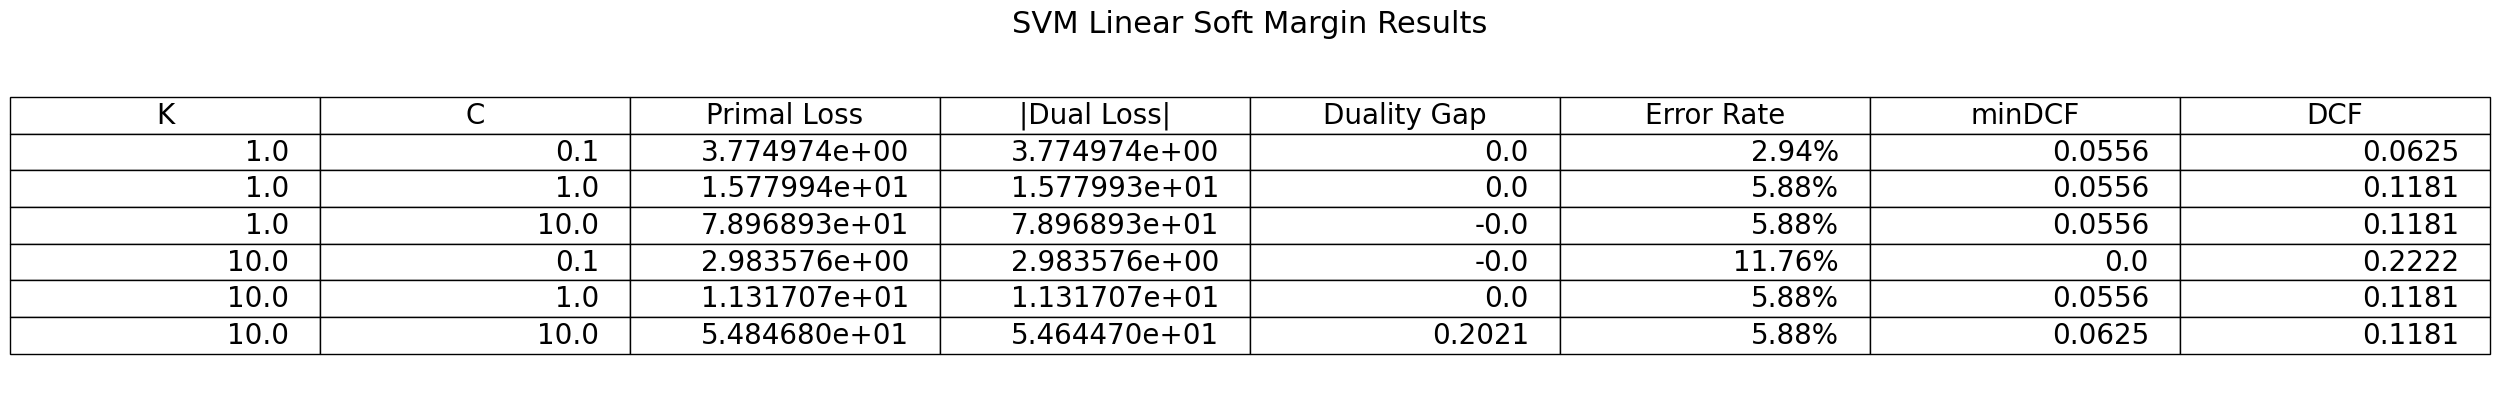

In [176]:
K_values = [1.0, 10.0]
C_values = [0.1, 1.0, 10.0]
appPriorTrue = 0.5
K_table = []
C_table = []
bestW_table = []
bestB_table = []
minDCF_table = []
DCFs_table = []
errorRate_table = []
primal_loss_table = []
dual_loss_table = []
dualitygap_table = []

for K_test in K_values:
    for C_test in C_values:
        bestW, bestB, minDCF, DCF, errorRate, primal, dual, dualitygap = fit_SVM_Linear_SoftMargin(DTR, LTR, DVAL, LVAL, C_test, K_test, appPriorTrue)
        print(f"Tested SVM_Linear_SoftMargin with C = {C_test}, K = {K_test}, minDCF = {minDCF}, DCF = {DCF}, errorRate = {errorRate}")
        K_table.append(K_test)
        C_table.append(C_test)
        bestW_table.append(bestW)
        bestB_table.append(bestB)
        minDCF_table.append(minDCF)
        DCFs_table.append(DCF)
        errorRate_table.append(errorRate)
        primal_loss_table.append(primal)
        dual_loss_table.append(dual)
        dualitygap_table.append(dualitygap)


#plot the results
#create table
table_data = []
for i in range(len(K_table)):
    table_data.append([K_table[i], C_table[i], f"{primal_loss_table[i]:.6e}", f"{-dual_loss_table[i]:.6e}", round(dualitygap_table[i], 4), f"{errorRate_table[i] * 100:.2f}%", round(minDCF_table[i], 4), round(DCFs_table[i], 4)])

fix, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data, colLabels=['K', 'C', 'Primal Loss', '|Dual Loss|', 'Duality Gap', 'Error Rate', 'minDCF', 'DCF'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(5, 2.2)
plt.title('SVM Linear Soft Margin Results', fontsize = 22)
plt.show()

    